<a href="https://colab.research.google.com/github/Novaz-Edd/Machine-Learning-Models/blob/main/XGBoost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **XGBoost (eXtreme Gradient Boosting)**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import io

# 1.Load Data
df = pd.read_csv('insurance.csv')

# 2. Preprocessing
# Convert text columns (sex, smoker, region) to numbers
df = pd.get_dummies(df, drop_first=True)

# 3. Separate Input (X) and Target (y)
X = df.drop('charges', axis=1)
y = df['charges']

# 4. Split into Train (80%) and Test (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"✅ Data Loaded! Training with {X_train.shape[0]} samples.")
print(f"✅ Testing with {X_test.shape[0]} samples.")

✅ Data Loaded! Training with 1070 samples.
✅ Testing with 268 samples.


# **XGBoost Regressor**

🚀 XGBoost Score: 0.85 (Closer to 1.0 is better)



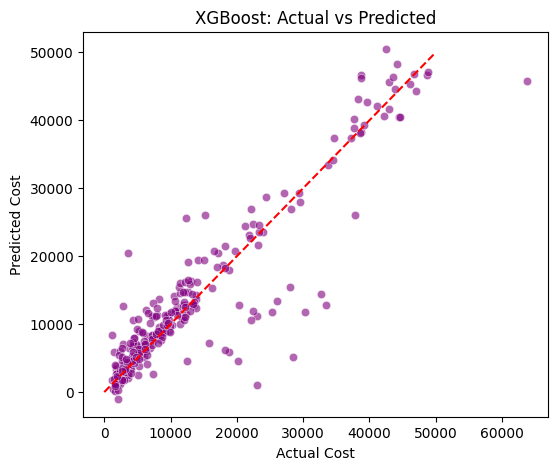

In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Train the Model
xgb_model = XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)

# 2. Predict on new data
y_pred = xgb_model.predict(X_test)

# 3. See how well it did
score = r2_score(y_test, y_pred)
print(f"🚀 XGBoost Score: {score:.2f} (Closer to 1.0 is better)\n")

# 4. Visualize the Result
plt.figure(figsize=(6,5))
sns.scatterplot(x=y_test, y=y_pred, color='purple', alpha=0.6)
plt.plot([0, 50000], [0, 50000], 'r--')
plt.xlabel('Actual Cost')
plt.ylabel('Predicted Cost')
plt.title('XGBoost: Actual vs Predicted')
plt.show()

# **Algorithm Under the Hood**

Base Prediction: $13346.09
Tree 1 trained.
Tree 2 trained.
Tree 3 trained.
Tree 4 trained.


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127795 (\N{DECIDUOUS TREE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


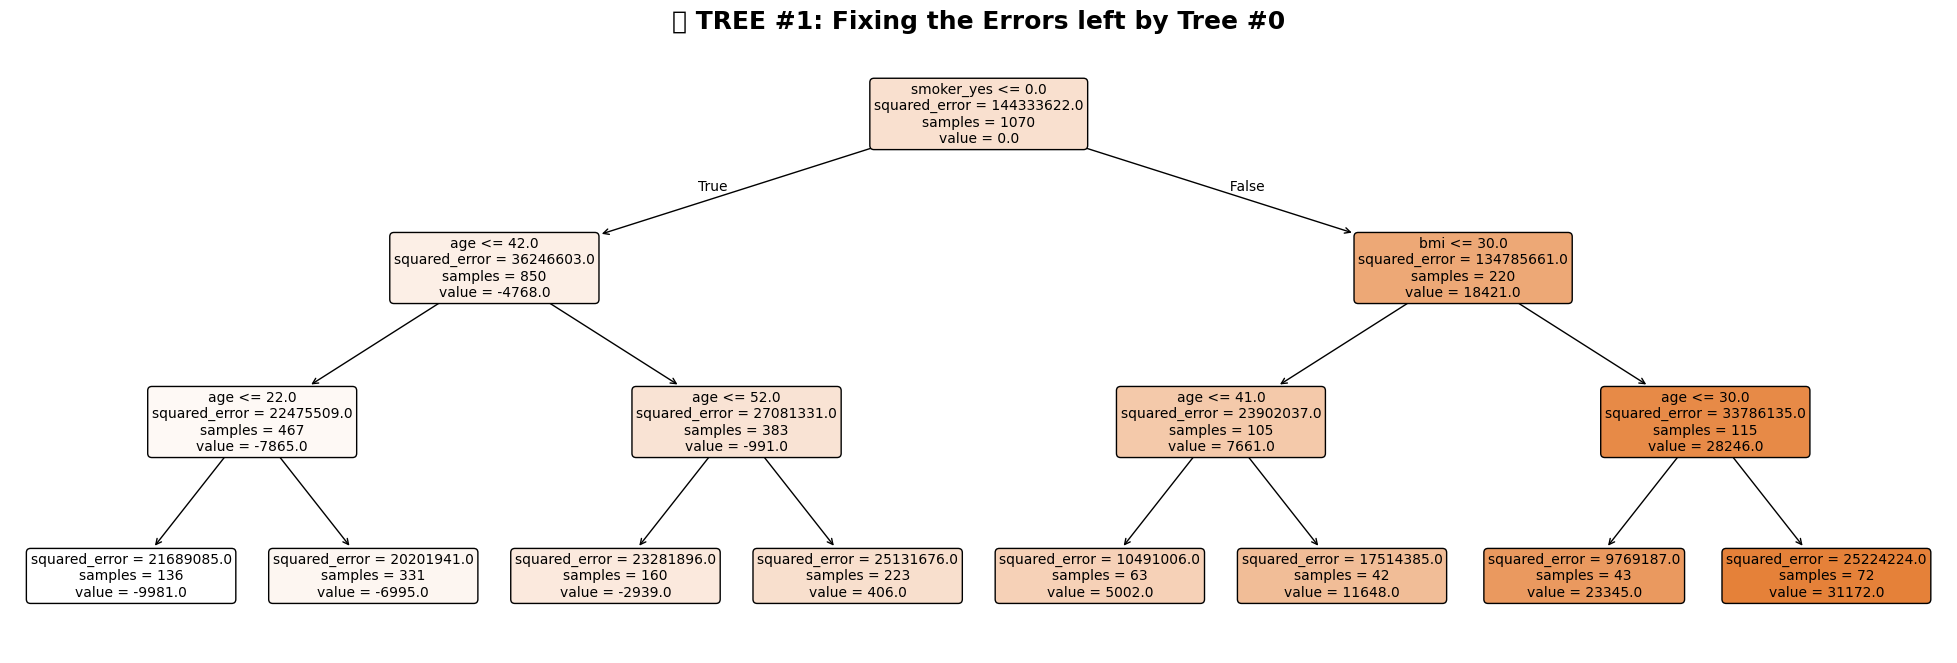

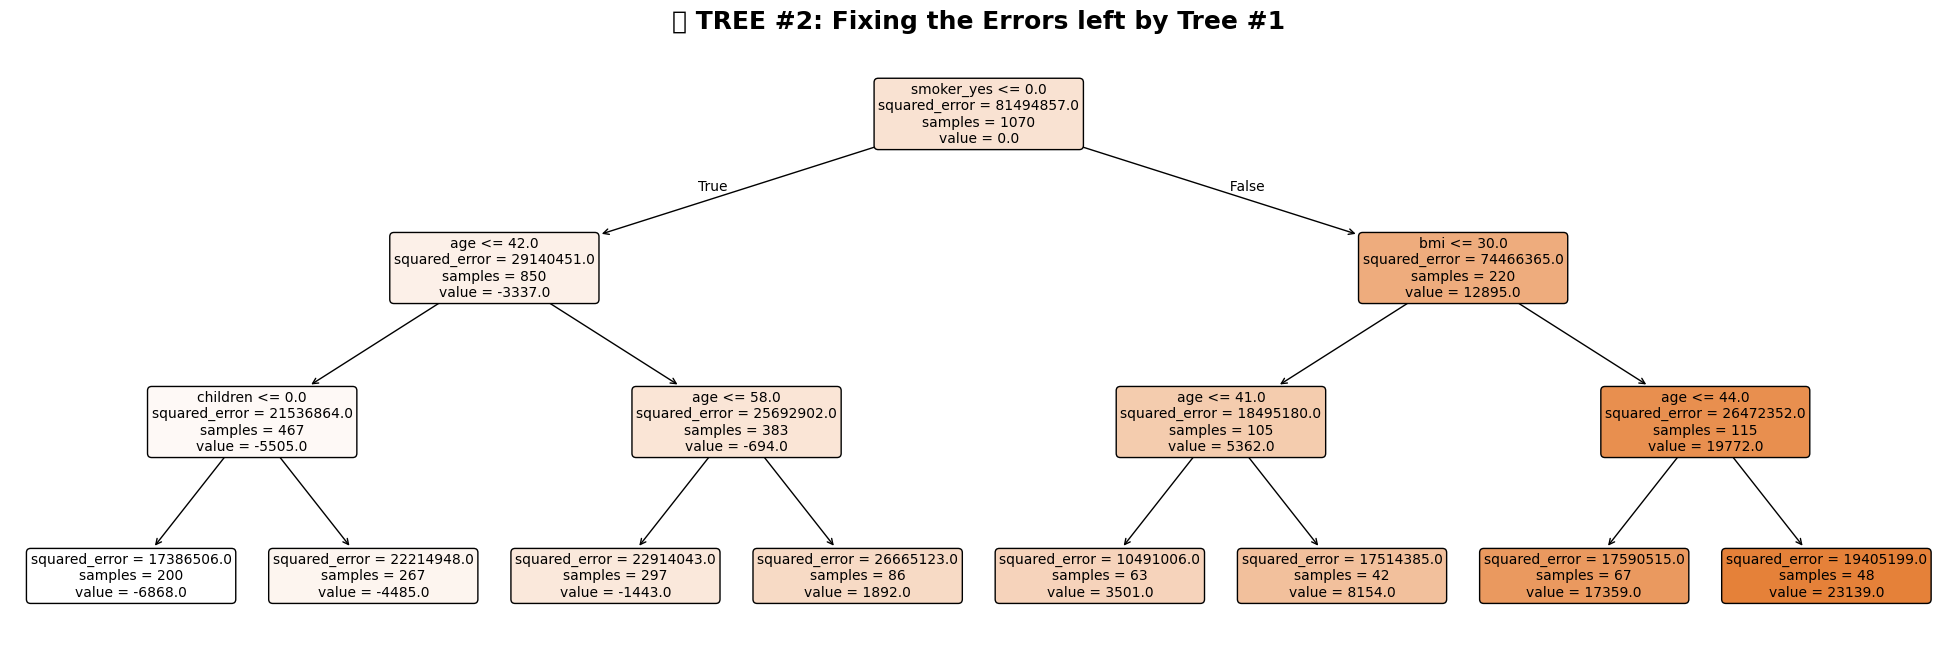

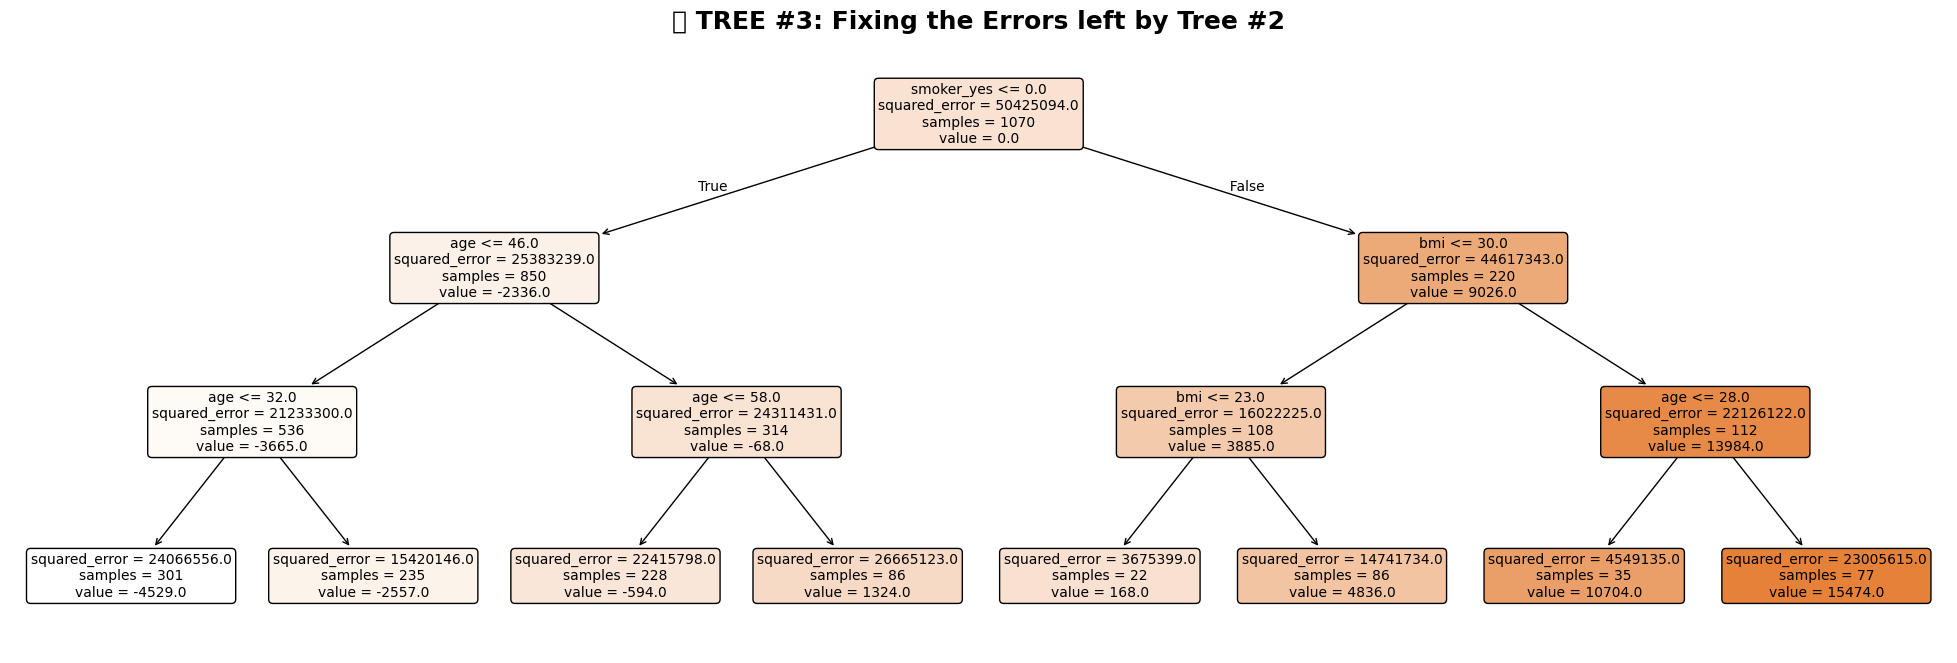

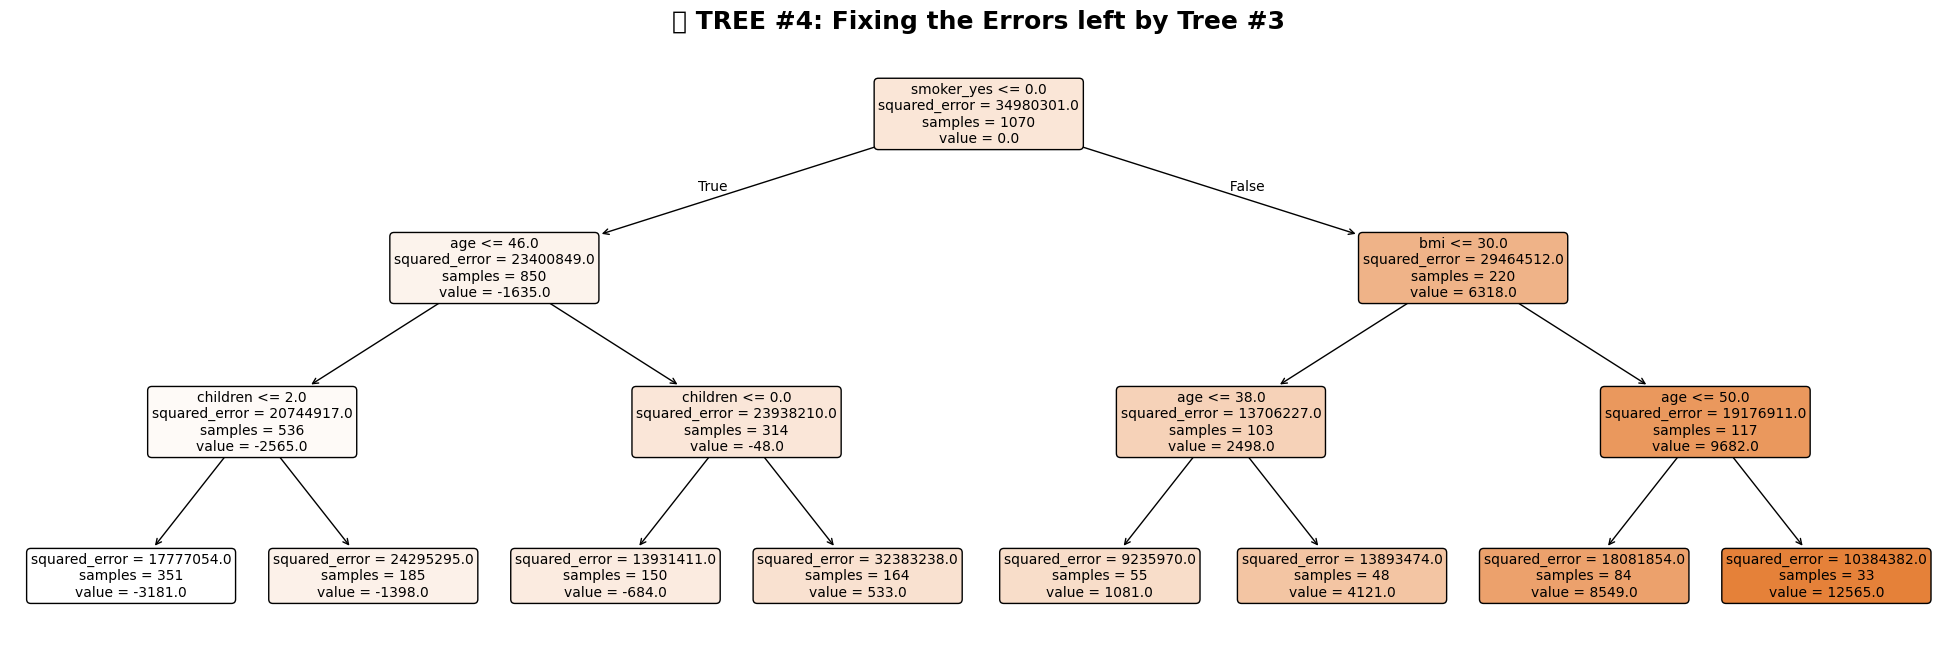

In [ ]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# 1. Load and Prep Data
df = pd.read_csv('insurance.csv')
df_encoded = pd.get_dummies(df, columns=['sex', 'smoker', 'region'], drop_first=True)

X = df_encoded.drop('charges', axis=1)
y = df_encoded['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ==========================================
# 🚀 MANUAL BOOSTING PROCESS
# ==========================================

n_trees = 4          # We want to see 4 trees
learning_rate = 0.3

# Step 0: Base Prediction
base_pred = y_train.mean()
train_pred = np.full(y_train.shape, base_pred)
stored_trees = []

print(f"Base Prediction: ${base_pred:.2f}")

# Train 4 Trees
for i in range(n_trees):
    # Calculate Error
    errors = y_train - train_pred

    # Fit Tree to Error
    tree = DecisionTreeRegressor(max_depth=3, random_state=42) # Depth 3 for better visuals
    tree.fit(X_train, errors)
    stored_trees.append(tree)

    # Update Predictions
    adjustment = tree.predict(X_train)
    train_pred = train_pred + (learning_rate * adjustment)
    print(f"Tree {i+1} trained.")

# ==========================================
# 📊 VISUALIZATION: STACKED TREES
# ==========================================

# We will create 4 separate plots, one below the other
for i in range(n_trees):
    plt.figure(figsize=(25, 8)) # Make it wide and readable

    # Plot the tree
    plot_tree(stored_trees[i],
              feature_names=X.columns,
              filled=True,
              rounded=True,
              precision=0,
              fontsize=10)

    plt.title(f"🌳 TREE #{i+1}: Fixing the Errors left by Tree #{i}", fontsize=18, fontweight='bold')
    plt.show() # This forces the next tree to be on a new "line"